# Amazon Copurchased

This is a Python notebook created using "jupyter".

Author: Rafael J. P. dos Santos

In [1]:
import time
started_at = time.time()
print started_at

1549337795.88


## Condições do experimento

* Quantidade limitada de arestas
* Todas as features
* Quantidade variável de n_estimators

## Parameters

We use the parameter below to set the maximum number of edges to be read from the CSV containing edges (links).

In [2]:
max_edges = 160000 # Set quantity to read from file
edges_csv_file = "data/20180812_links"
nodes_csv_file = "data/20180812_nodes"
n_estimators = 20
features = 'all'

In [3]:
# Parameters
n_estimators = 20
max_edges = 0
features = "all_except_network_metrics"


## Load the libraries

Let's load the Python libraries that we will need throughout the script

In [4]:
%load_ext autoreload
%autoreload 1
%aimport shared_functions
import pandas as pd
import numpy as np
from __future__ import division
import shared_functions
from IPython.display import display, HTML

## Read graph

### Read only first lines of datafile

Due to slowness in calculating centrality measures, we use the parameter provided in the beggining of the script to limit the number of edges we will read.

In [5]:
G = shared_functions.read_G(edges_csv_file, max_edges)

Using 229338 edges out of 229338 available (100.00% of data)


### Calculate nodes centrality measures

Now that we have our NetworkX graph, let's calculate some centrality measures for every node.

In [6]:
centrality_measures = shared_functions.centrality_measures(G)
print centrality_measures.keys()

['eigenvector_centrality', 'degree', 'betweenness_centrality']


### Load node properties

Let's load the CSV containing the nodes data (title, price) into a Pandas dataframe, and append the centrality measures calculated above.

In [7]:
df = pd.read_csv(nodes_csv_file)

####  Convert ID to random int to avoid leaking knowledge

In [8]:
df = shared_functions.add_sha256_column_from_id(df)

#### Add centrality measures

In [9]:
df = shared_functions.merge_columns(df, centrality_measures)

### Let's convert some fields to numeric

In [10]:
if features == 'all':
    
    categorical_features = [
        'category1',
        'category2',
        'category3',
        'category4',
        'category5',
        'category6',
        'category7',
        'category8',
        'category9',
        'category10',
        'language',
        'coverType',
        'publisher',
        'rankingCategory',
        'authors'
    ]

    numeric_features = [
        'degree',
        'eigenvector_centrality',
        'betweenness_centrality',
        'ranking',
        'reviewCount',
        'pages',
        'weight',
        'height',
        'width',
        'depth',
        'rating'
    ]
    
elif features == 'all_except_network_metrics':
    
    categorical_features = [
        'category1',
        'category2',
        'category3',
        'category4',
        'category5',
        'category6',
        'category7',
        'category8',
        'category9',
        'category10',
        'language',
        'coverType',
        'publisher',
        'rankingCategory',
        'authors'
    ]

    numeric_features = [
        'ranking',
        'reviewCount',
        'pages',
        'weight',
        'height',
        'width',
        'depth',
        'rating'
    ]

elif features == 'none':
    
    categorical_features = []

    numeric_features = []

df = shared_functions.prepare_data(df, numeric_features)

### Remove nodes without price

In [11]:
df = df.drop(df[df["price"].isnull()].index)

### Inspect columns

In [12]:
df.columns

Index([u'id', u'title', u'url', u'authors', u'coverType', u'publisher',
       u'edition', u'publicationDate', u'rankingCategory', u'category1',
       u'category2', u'category3', u'category4', u'category5', u'category6',
       u'category7', u'category8', u'category9', u'category10', u'isbn10',
       u'isbn13', u'language', u'postProcessed', u'price', u'ranking',
       u'pages', u'reviewCount', u'rating', u'width', u'height', u'depth',
       u'weight', u'sha256_id', u'eigenvector_centrality', u'degree',
       u'betweenness_centrality'],
      dtype='object')

### Features summary

Below we have a summary of the Pandas dataframe. We can see the number of nodes that we are actually analyzing, which depends on the max_edges parameter defined before.

In [13]:
pd.set_option('display.max_columns', None)
df.describe(include='all', percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
count,9153.000000,9153,9153,9152,9035,9052,0.0,783,8820,8707,8707,6525,3345,1205,188,17,0.0,0.0,0.0,9055,9055,9050,9153.0,9153.000000,9153.000000,9153.000000,9153.000000,9153.000000,9153.000000,9153.000000,9153.000000,9153.000000,9.153000e+03,9.153000e+03,9153.000000,9153.000000
unique,NaN,8952,9153,6177,11,728,NaN,574,1,1,28,228,440,309,71,8,NaN,NaN,NaN,9055,9055,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Macroeconomia,https://www.amazon.com.br/dp/8580332990/,Vários Autores (Autor),Capa comum,Companhia das Letras,NaN,1 de janeiro de 2014,Livros,Livros,"Política, Filosofia e Ciências Sociais",Filosofia,Matemática,Brasil,Probabilidade e Estatística,Neurociência,NaN,NaN,NaN,8525431494,978-8582600481,Português,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,6,1,106,7729,536,NaN,13,8820,8707,1557,914,165,78,18,4,NaN,NaN,NaN,1,1,7976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4896.658473,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,71.900469,35581.243023,352.333450,14.392313,4.443767,15.276002,22.264502,2.077165,425.828030,2.122251e+09,3.406945e-03,31.259587,0.000991
std,2826.520995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,145.716338,45683.667822,249.857638,32.650533,0.551851,2.574086,2.590565,1.208801,201.984523,1.240653e+09,9.780235e-03,34.801327,0.001553
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.900000,3.000000,2.000000,1.000000,1.000000,0.800000,8.600000,0.200000,4.500000,2.291770e+05,6.734553e-11,1.000000,0.000000
25%,2481.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,26.310000,8345.000000,192.000000,2.000000,4.400000,13.600000,20.800000,1.300000,281.000000,1.025729e+09,1.755986e-05,8.000000,0.000184
50%,4900.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,39.110000,22980.000000,304.000000,10.000000,4.445241,15.304075,22.600000,1.800000,426.421903,2.113182e+09,2.125446e-04,19.000000,0.000507
75%,7348.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,63.110000,45609.000000,432.000000,14.304266,4.800000,16.000000,23.200000,2.600000,535.000000,3.182206e+09,1.596866e-03,43.000000,0.001204


Below we can inspect the first rows of data, containing title, price, degree and other centrality measures.

In [14]:
df.head(10)

,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,sha256_id,eigenvector_centrality,degree,betweenness_centrality
0,1,The Stanford Mathematics Problem Book: With Hi...,https://www.amazon.com.br/dp/0486469247/,"George Polya (Autor),",Capa comum,Dover Publications,NaN,19 de fevereiro de 2009,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Estudo e Ensino,NaN,NaN,NaN,NaN,NaN,0486469247,978-0486469249,Inglês,1,26.25,59183.0,68.0,1.000000,4.000000,14.0,21.0,0.6,181.0,3564330554,2.295138e-05,19,0.000942
1,2,Fourier Series,https://www.amazon.com.br/dp/0486633179/,"Georgi P. Tolstov (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1976,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486633179,978-0486633176,Inglês,1,50.37,56112.0,352.0,3.000000,4.600000,14.6,21.0,1.9,363.0,1309098117,4.595498e-06,62,0.000983
2,3,Probability Theory: A Concise Course,https://www.amazon.com.br/dp/0486635449/,"Y. A. Rozanov (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Probabilidade e Estatística,NaN,NaN,NaN,NaN,0486635449,978-0486635446,Inglês,1,29.23,44345.0,160.0,14.304266,4.445241,14.4,20.8,0.8,200.0,1260550007,5.866979e-06,59,0.002524
3,4,"Vectors, Tensors and the Basic Equations of Fl...",https://www.amazon.com.br/dp/0486661105/,"Rutherford Aris (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Engenharia e Transporte,Engenharia,Mecânica,Hidráulica,NaN,NaN,NaN,NaN,0486661105,978-0486661100,Inglês,1,48.79,82275.0,320.0,2.000000,4.500000,13.7,21.5,1.6,381.0,4012708477,1.159003e-06,18,0.006160
4,5,Ordinary Differential Equations,https://www.amazon.com.br/dp/0486649407/,"Morris Tenenbaum (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486649407,978-0486649405,Inglês,1,71.63,40840.0,848.0,4.000000,4.500000,13.8,21.8,4.0,939.0,3891707921,8.827188e-06,88,0.002339
5,6,The Variational Principles of Mechanics,https://www.amazon.com.br/dp/0486650677/,"Cornelius Lanczos (Autor),",Capa comum,Dover Publications,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486650677,978-0486650678,Inglês,1,88.15,36960.0,418.0,1.000000,5.000000,13.8,21.5,2.2,581.0,2030201243,8.323662e-06,43,0.001256
6,7,A First Look at Perturbation Theory,https://www.amazon.com.br/dp/0486675513/,James G. Simmonds (Autor),Capa comum,Dover Publications Inc.,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Equações Diferenciais,NaN,NaN,NaN,NaN,0486675513,978-0486675510,Inglês,1,36.10,37291.0,160.0,14.304266,4.445241,13.7,21.5,0.8,159.0,744636978,4.951852e-07,9,0.000398
7,8,Thermodynamics and the Kinetic Theory of Gases...,https://www.amazon.com.br/dp/0486414612/,"Wolfgang Pauli (Autor),",Capa comum,Dover Publications,NaN,18 de outubro de 2010,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Dinâmica,Termodinâmica,NaN,NaN,NaN,NaN,0486414612,978-0486414614,Inglês,1,26.01,24406.0,160.0,2.000000,5.000000,13.8,21.6,1.0,159.0,425205287,1.803160e-05,10,0.001100
8,9,Mechanics,https://www.amazon.com.br/dp/0486607542/,"Jacob P. Den Hartog (Autor),",Capa comum,Dover Publications,NaN,1 de junho de 1961,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Física,Mecânica,NaN,NaN,NaN,NaN,NaN,0486607542,978-0486607542,Inglês,1,50.96,90609.0,480.0,14.304266,4.445241,13.6,20.3,2.3,522.0,1246026773,1.837624e-06,23,0.000656
9,10,Statistical Thermodynamics,https://www.amazon.com.br/dp/0486661016/,"Erwin Schrodinger (Autor),",Capa 

## Random forest using various features, price as target

### Preparing data

In [15]:
target, features, feature_list, test_features, test_target = shared_functions.prepare_datasets(df, numeric_features, categorical_features, 'price')

Numeric features:  ['ranking', 'reviewCount', 'pages', 'weight', 'height', 'width', 'depth', 'rating']
Categorical features:  ['category1', 'category2', 'category3', 'category4', 'category5', 'category6', 'category7', 'category8', 'category9', 'category10', 'language', 'coverType', 'publisher', 'rankingCategory', 'authors']
Target column:  price
Test percentage:  0.200043701519
Train features shape:  (7322, 8006)
Train target shape:  (7322,)
Test features shape:  (1831, 8006)
Test target shape:  (1831,)


### Average price and median price as baselines

It's important to have a baseline, so we can validate our predictions after running our model. One easy choice for baseline is the average price of a book.

We have an average price around R\$43, so this means that a very easy prediction would be to always guess R$43 for the price of any book.

In [16]:
average_target = np.average(target)
median_target = np.median(target)
print "Average price: R$", average_target
print "Median parice; R$", median_target

Average price: R$ 72.20890603660203
Median parice; R$ 39.225


### Cross val

#### Run cross val

In [17]:
estimators, splits, scores = shared_functions.run_cross_validation_regression(features, target, n_estimators)

#### Cross val score

In [18]:
shared_functions.print_score_summary(scores)

=== Relative
RF relative abs mean:  0.34509654256635636
RF relative abs std:  0.020429617963765936
Baseline (average) relative mean:  1.3405548642680105
Baseline (average) relative std:  0.05278750436209624
Baseline (median) relative mean:  0.5933214339325056
Baseline (median) relative std:  0.023286129759677383
=== Absolute
RF abs mean:  23.44812741279568
RF abs std:  3.8214418526318523
Baseline (average) mean:  58.26738864339537
Baseline (average) std:  4.312767401694949
Baseline (median) mean:  46.51288884478042
Baseline (median) std:  4.743729445682507


####  List of most important features

In [19]:
shared_functions.get_most_important_features(estimators, feature_list)

,feature,mean importance,std,std/mean
0,pages,22.033199,2.454540,0.111402
1,language_Inglês,17.680875,0.656500,0.037131
2,category2_Inglês e Outras Línguas,13.014336,2.054457,0.157861
3,width,6.671929,1.189089,0.178223
4,publisher_Cengage Learning,5.272332,2.032251,0.385456
5,height,4.985561,0.342671,0.068733
6,ranking,4.239685,0.740726,0.174713
7,coverType_Capa dura,2.880438,1.027903,0.356856
8,coverType_Capa comum,2.438588,0.641583,0.263096
9,depth,2.193928,0.444297,0.202512


### Predicted price vs real price

Splits quantity:  10
Splits lenghts:  [733, 733, 732, 732, 732, 732, 732, 732, 732, 732]
X shape:  (7322, 8006)
y shape:  (7322,)


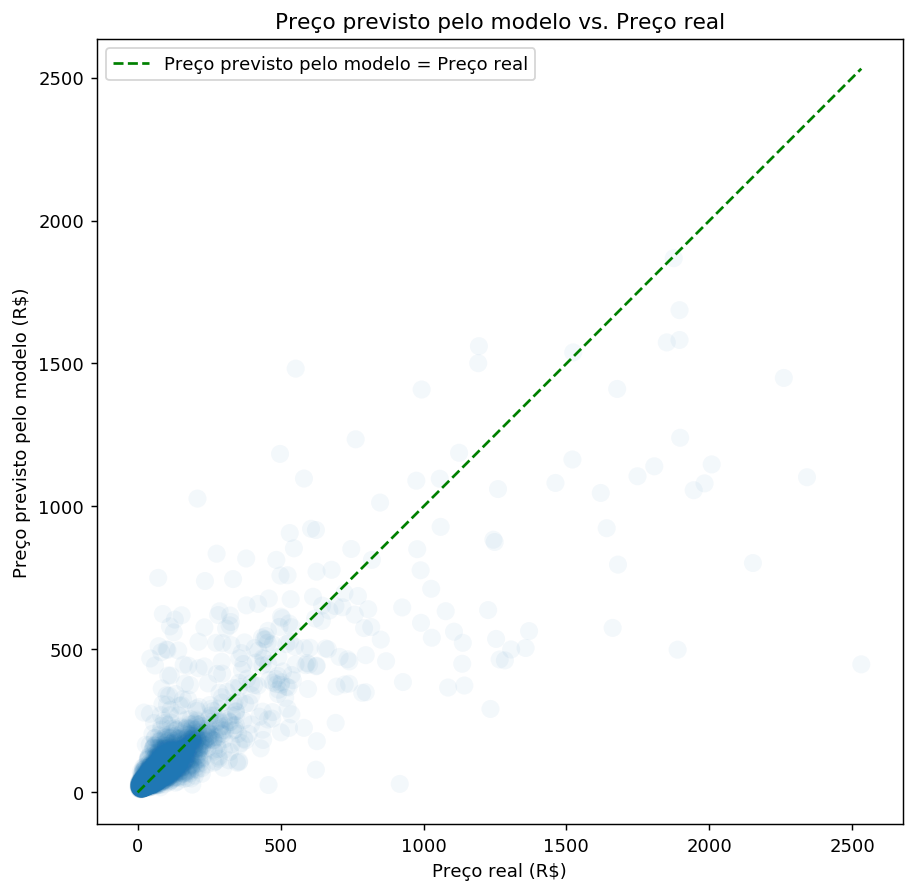

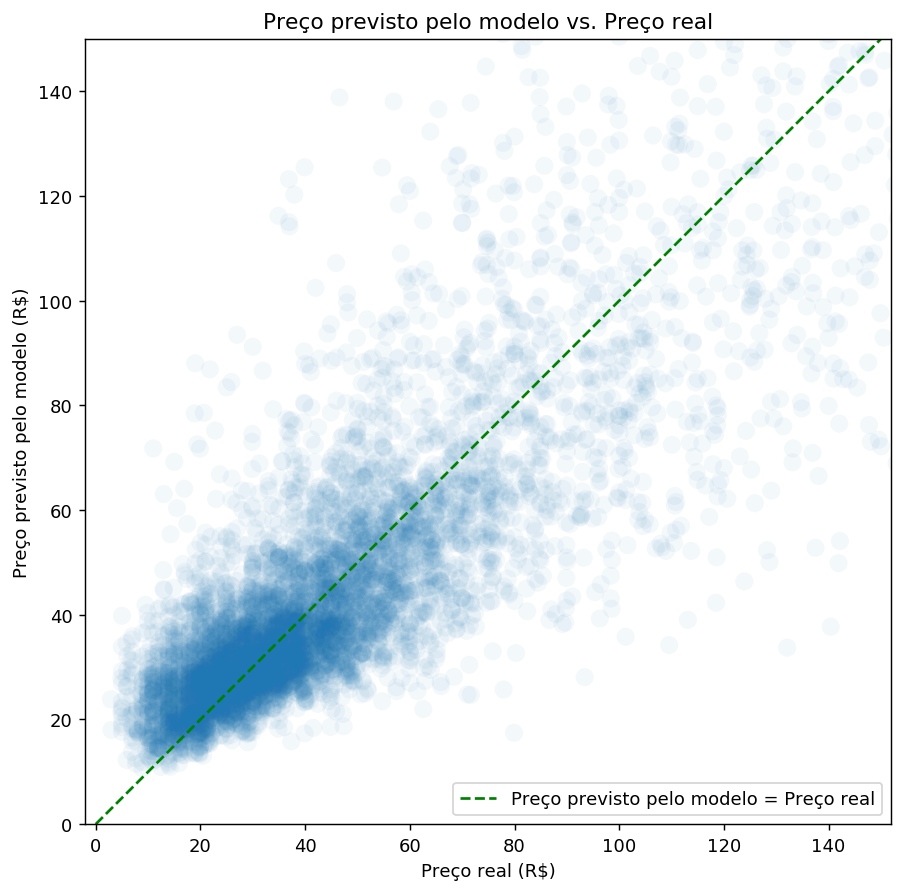

In [20]:
y_pred = shared_functions.get_all_predictions_from_splits(features, target, splits, estimators)                                                  
shared_functions.plot_splits_predicted_vs_real(target, y_pred, title=u'Preço previsto pelo modelo vs. Preço real', xlabel=u'Preço real (R$)', ylabel=u'Preço previsto pelo modelo (R$)', legend=u'Preço previsto pelo modelo = Preço real', zoomY = 150)

### Mean absolute error

Now we can compare the errors obtained by our predictions against the errors provided by the baseline (average price). Our prediction errors should be less than the baseline errors to consider the model successful.

In [21]:
errors, errors_baseline, errors_relative, errors_baseline_relative, errors_baseline_median, errors_baseline_median_relative = shared_functions.print_mean_absolute_error(y_pred, target, average_target, median_target)

== Absolute
('Mean absolute prediction error: R$', 23.45)
('Std prediction error: R$', 74.41)
('Mean absolute error using average: R$', 58.27)
('Std prediction error using average: R$', 136.58)
('Mean absolute error using median: R$', 46.51)
('Std prediction error using median: R$', 144.82)
== Relative
('Mean relative absolute prediction error: ', 0.35)
('Std relative prediction error: ', 0.53)
('Mean relative absolute error using average: ', 1.34)
('Std relative prediction error using average: ', 1.51)
('Mean absolute error using median: R$', 0.59)
('Std prediction error using median: R$', 0.69)


### Join data

In [22]:
pd.set_option('display.max_columns', None)
predicted_df, joined_predicted_df = shared_functions.join_predicted_df(df, features, target, y_pred, errors, errors_relative, errors_baseline, errors_baseline_relative, errors_baseline_median, errors_baseline_median_relative)

### Worst absolute predictions

Below we can inspect the rows with the biggest prediction error.

In [23]:
joined_predicted_df.sort_values('error', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4.565469e+08,"[456546893.0, 36621.5086819, 14.3042662916, 34...",2083.2565,2458.861094,2491.845,0.984503,0.971471,0.823073,447.8135,2531.07,1685,Complex Analysis Complex Analysis Complex Anal...,https://www.amazon.com.br/dp/0070006571/,"Lars V. Ahlfors (Autor),",Capa dura,McGraw-Hill Science/Engineering/Math,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0070006571,978-0070006577,Inglês,1,2531.07,36621.508682,345.000000,14.304266,4.445241,16.000000,23.100000,2.500000,426.421903,2.329153e-06,40,0.000313
9.158984e+07,"[91589843.0, 311760.0, 14.3042662916, 545.0, 4...",1389.6780,1816.551094,1849.535,0.979232,0.961769,0.735762,499.0820,1888.76,1712,Vector Calculus,https://www.amazon.com.br/dp/1429215089/,"Jerrold E. Marsden (Autor),",Capa dura,W.H. Freeman & Company,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Aplicada,Análise Vetorial,NaN,NaN,NaN,NaN,1429215089,978-1429215084,Inglês,1,1888.76,311760.000000,545.000000,14.304266,4.445241,21.000000,26.000000,3.200000,426.421903,6.891534e-06,47,0.000876
7.945218e+08,"[794521798.0, 36621.5086819, 14.3042662916, 76...",1350.0860,2079.961094,2112.945,0.981774,0.966448,0.627314,802.0840,2152.17,2199,Introduction to Chemical Engineering Thermodyn...,https://www.amazon.com.br/dp/1259696529/,J.M. Smith Termodinamica en ingenieria quimica...,Capa dura,McGraw-Hill Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1259696529,978-1259696527,Inglês,1,2152.17,36621.508682,768.000000,14.304266,4.445241,18.500000,23.900000,3.300000,426.421903,1.019546e-07,17,0.000119
1.731114e+09,"[1731113829.0, 36621.5086819, 14.3042662916, 6...",1238.9535,2268.991094,2301.975,0.983246,0.969157,0.529196,1102.2465,2341.20,1779,Modern Physics for Scientists and Engineers,https://www.amazon.com.br/dp/1133103723/,"Stephen T. Thornton (Autor),",Capa dura,Cengage Learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1133103723,978-1133103721,Inglês,1,2341.20,36621.508682,688.000000,14.304266,4.445241,20.300000,25.400000,3.200000,426.421903,2.755302e-06,35,0.000665
1.895458e+09,"[1895458154.0, 36621.5086819, 14.3042662916, 4...",1086.2935,1589.271094,1622.255,0.976392,0.956539,0.653811,575.1865,1661.48,1897,A Transition to Advanced Mathematics,https://www.amazon.com.br/dp/1285463269/,"Douglas Smith (Autor),",Capa dura,Cengage Learning,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1285463269,978-1285463261,Inglês,1,1661.48,36621.508682,448.000000,14.304266,4.445241,19.000000,23.500000,1.900000,748.000000,2.962115e-06,28,0.000284
1.954206e+09,"[1954206171.0, 409733.0, 1.0, 402.0, 798.0, 25...",942.4815,1162.001094,1194.985,0.968219,0.941494,0.763631,291.7285,1234.21,1697,Introduction to Real Analysis,https://www.amazon.com.br/dp/0471433314/,"Robert G. Bartle (Autor),",Capa dura,John Wiley & Sons,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Ciências Tecnológicas,Matemática,Análise Matemática,NaN,NaN,NaN,NaN,NaN,0471433314,978-0471433316,Inglês,1,1234.21,409733.000000,402.000000,1.000000,1.000000,18.200000,25.600000,2.000000,798.000000,4.004990e-06,45,0.000396
1.063205e+09,"[1063204870.0, 36621.5086819, 14.3042662916, 7...",929.1595,480.671094,513.655,0.929053,0.869395,1.680581,1482.0395,552.88,1916,"Modern Optical Engineering, 4th Ed.",https://www.amazon.com.br/dp/0071476873/,Warren J. Smith (Autor),Capa dura,McGraw-Hill Education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0071476873,978-0071476874,Inglês,1,552.88,36621.50868

### Worst relative predictions

In [24]:
joined_predicted_df.sort_values('error_relative', ascending = False).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4.047607e+09,"[4047607377.0, 67771.0, 1.0, 136.0, 68.0, 8.6,...",257.0500,50.138906,17.155,0.777300,2.271813,11.647032,279.1200,22.07,9312,How to Win Friends & Influence People (Miniatu...,https://www.amazon.com.br/dp/0762462019/,Dale Carnegie (Autor),Capa dura,Running Press Miniature Editions,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,"Administração, Negócios e Economia",NaN,NaN,NaN,NaN,NaN,NaN,NaN,0762462019,978-0762462018,Inglês,1,22.07,67771.000000,136.000000,1.000000,1.000000,7.300000,8.600000,1.600000,68.000000,3.266231e-04,5,0.000583
3.548407e+09,"[3548407309.0, 15302.0, 7.0, 1112.0, 426.42190...",424.2280,27.918906,5.065,0.114360,0.630366,9.578415,468.5180,44.29,9183,The Complete Fiction of H. P. Lovecraft,https://www.amazon.com.br/dp/0785834206/,H. P. Lovecraft (Autor),Capa dura,Chartwell Books,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,Literatura e Ficção,Ficção,NaN,NaN,NaN,NaN,NaN,NaN,0785834206,978-0785834205,Inglês,1,44.29,15302.000000,1112.000000,7.000000,5.000000,17.800000,25.400000,5.100000,426.421903,2.308690e-06,2,0.000050
2.760304e+09,"[2760303957.0, 36621.5086819, 14.3042662916, 3...",678.1900,0.178906,32.805,0.455435,0.002484,9.415382,750.2200,72.03,1874,The Mathematics of Secrets – Cryptography from...,https://www.amazon.com.br/dp/0691183317/,Joshua Holden (Autor),Capa comum,Princeton University Press,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0691183317,978-0691183312,Inglês,1,72.03,36621.508682,392.000000,14.304266,4.445241,15.304075,22.288019,2.086614,667.000000,2.105030e-05,56,0.001918
3.020829e+09,"[3020829397.0, 14037.0, 48.0, 60.0, 141.0, 22....",20.9460,69.308906,36.325,12.525862,23.899623,7.222759,23.8460,2.90,5084,Elevador 16,https://www.amazon.com.br/dp/8562409456/,Rodrigo De Oliveira (Autor),Capa comum,Faro,NaN,NaN,Livros,Livros,Literatura e Ficção,Literatura Infantojuvenil,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8562409456,978-8562409455,Português,1,2.90,14037.000000,60.000000,48.000000,4.500000,15.600000,22.600000,0.600000,141.000000,3.636689e-04,19,0.000503
4.254723e+09,"[4254722701.0, 22501.0, 14.3042662916, 240.0, ...",34.8100,67.208906,34.225,6.845000,13.441781,6.962000,39.8100,5.00,8487,Lacan com Derrida,https://www.amazon.com.br/dp/8520005926/,Rene Major (Autor),Capa comum,Civilização Brasileira,NaN,16 de outubro de 2002,Livros,Livros,Saúde e Família,Psicologia e Aconselhamento,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8520005926,978-8520005927,Português,1,5.00,22501.000000,240.000000,14.304266,4.445241,13.400000,20.800000,1.600000,340.000000,1.095133e-05,1,0.000000
9.919350e+08,"[991934982.0, 36621.5086819, 14.3042662916, 34...",382.8675,11.338906,21.645,0.355594,0.186281,6.289921,443.7375,60.87,1881,Discrete Mathematics: An Open Introduction,https://www.amazon.com.br/dp/1534970746/,Oscar Levin (Autor),Capa comum,Createspace Independent Publishing Platform,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1534970746,978-1534970748,Inglês,1,60.87,36621.508682,346.000000,14.304266,4.445241,15.200000,22.900000,2.000000,358.000000,7.037687e-06,54,0.001174
8.719099e+08,"[871909854.0, 36621.5086819, 14.3042662916, 49...",535.6220,16.091094,49.075,0.555776,0.182232,6.065934,623.9220,88.30,2080,"Cracking the GRE with 4 Practice Tests, 2019 E...",https://www.amazon.com.br/dp/1524757918/,Princeton Review (Autor),Capa comum,Princeton Review,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1524757918,978-1524757915,Inglês,1,88.30,36621.508682,496.000000,14.304266,4.445241,21.2

### Best absolute predictions

In [25]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2.452388e+09,"[2452388180.0, 52520.0, 2.0, 224.0, 381.0, 20....",0.0010,35.628906,2.645,0.072307,0.974000,0.000027,36.5790,36.58,126,A Teoria da Relatividade Restrita,https://www.amazon.com.br/dp/8539304724/,David Bohm (Autor),Capa comum,UNESP,NaN,NaN,Livros,Livros,Ciências,Física,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8539304724,978-8539304721,Português,1,36.58,52520.0,224.0,2.000000,5.000000,13.8,20.8,2.0,381.000000,1.669341e-04,23,0.001495
1.363975e+09,"[1363974885.0, 55003.0, 1.0, 216.0, 358.0, 23....",0.0030,33.928906,0.945,0.024687,0.886335,0.000078,38.2770,38.28,5254,Eric Voegelin. A Restauração da Ordem,https://www.amazon.com.br/dp/8580330203/,Michael P. Federici (Autor),Capa comum,É Realizações,NaN,NaN,Livros,Livros,Literatura e Ficção,Teoria e Crítica Literária,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8580330203,978-8580330205,Português,1,38.28,55003.0,216.0,1.000000,5.000000,13.4,23.2,2.0,358.000000,7.736311e-03,22,0.000125
1.162736e+09,"[1162735799.0, 14914.0, 14.3042662916, 416.0, ...",0.0035,0.701094,33.685,0.462008,0.009616,0.000048,72.9065,72.91,9376,The Alchemy of Finance,https://www.amazon.com.br/dp/0471445495/,"Paul A. Volcker (Prólogo, Autor),",Capa comum,Wiley,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,"Administração, Negócios e Economia",Indústrias e Profissões,Contabilidade,NaN,NaN,NaN,NaN,NaN,0471445495,978-0471445494,Inglês,1,72.91,14914.0,416.0,14.304266,4.445241,15.2,22.9,3.0,499.000000,3.119195e-05,9,0.003223
5.890419e+08,"[589041894.0, 58306.0, 14.3042662916, 6.0, 81....",0.0050,54.808906,21.825,1.254310,3.149937,0.000287,17.4050,17.40,7180,Física. Solução de Problemas,https://www.amazon.com.br/dp/8577110400/,Mark Jackson (Autor),Capa flexível,Barros Fischer & Associados,NaN,NaN,Livros,Livros,Ciências,Física,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8577110400,978-8577110407,Português,1,17.40,58306.0,6.0,14.304266,4.445241,21.1,28.2,0.8,81.600000,1.437978e-08,18,0.000085
1.679820e+09,"[1679819815.0, 49166.0, 14.3042662916, 152.0, ...",0.0065,51.208906,18.225,0.867857,2.438519,0.000310,21.0065,21.00,5786,De que Serve Ser Culto?,https://www.amazon.com.br/dp/8583170304/,Normand Baillargeon (Autor),Capa comum,Apicuri,NaN,NaN,Livros,Livros,"Política, Filosofia e Ciências Sociais",Filosofia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8583170304,978-8583170303,Português,1,21.00,49166.0,152.0,14.304266,4.445241,11.8,17.8,0.8,99.800000,1.618912e-05,1,0.000000
8.777778e+08,"[877777757.0, 933.0, 6.0, 176.0, 200.0, 20.8, ...",0.0065,43.008906,10.025,0.343322,1.472908,0.000223,29.1935,29.20,2355,O Amor que nos Faz Bem,https://www.amazon.com.br/dp/8542204352/,Joan Garriga (Autor),Capa comum,Planeta,NaN,NaN,Livros,Livros,Saúde e Família,Relacionamentos,Busca de Companheiro,NaN,NaN,NaN,NaN,NaN,NaN,8542204352,978-8542204353,Português,1,29.20,933.0,176.0,6.000000,4.800000,13.6,20.8,1.2,200.000000,1.034996e-05,22,0.000178
1.665596e+09,"[1665596443.0, 9634.0, 7.0, 280.0, 422.0, 23.2...",0.0080,37.158906,4.175,0.119116,1.060169,0.000228,35.0420,35.05,4329,A Orgia Perpétua. Flaubert e Madame Bovary,https://www.amazon.com.br/dp/8579624312/,Mario Vargas Llosa (Autor),Capa comum,Alfaguara,NaN,NaN,Livros,Livros,Saúde e Família,Psicologia e Aconselhamento,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8579624312,978-8579624315,Português,1,35.05,9634.0,280.0,7.000000,4.700000,14.8,23.2,1.4,422.000000,1.080380e-02,45,0.001325
2.866538e+08,"[286653824.0, 4784.0, 4.0, 320.0, 322.0, 19.8,...",0.0085,44.178906,11.195,0.399394,1.576129,0.000303,28.0385,28.03,4011,Um Retrato 

### Best relative predictions

In [26]:
joined_predicted_df.sort_values('error', ascending = True).head(20)

,all_features,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,title,url,authors,coverType,publisher,edition,publicationDate,rankingCategory,category1,category2,category3,category4,category5,category6,category7,category8,category9,category10,isbn10,isbn13,language,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
sha256_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2.452388e+09,"[2452388180.0, 52520.0, 2.0, 224.0, 381.0, 20....",0.0010,35.628906,2.645,0.072307,0.974000,0.000027,36.5790,36.58,126,A Teoria da Relatividade Restrita,https://www.amazon.com.br/dp/8539304724/,David Bohm (Autor),Capa comum,UNESP,NaN,NaN,Livros,Livros,Ciências,Física,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8539304724,978-8539304721,Português,1,36.58,52520.0,224.0,2.000000,5.000000,13.8,20.8,2.0,381.000000,1.669341e-04,23,0.001495
1.363975e+09,"[1363974885.0, 55003.0, 1.0, 216.0, 358.0, 23....",0.0030,33.928906,0.945,0.024687,0.886335,0.000078,38.2770,38.28,5254,Eric Voegelin. A Restauração da Ordem,https://www.amazon.com.br/dp/8580330203/,Michael P. Federici (Autor),Capa comum,É Realizações,NaN,NaN,Livros,Livros,Literatura e Ficção,Teoria e Crítica Literária,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8580330203,978-8580330205,Português,1,38.28,55003.0,216.0,1.000000,5.000000,13.4,23.2,2.0,358.000000,7.736311e-03,22,0.000125
1.162736e+09,"[1162735799.0, 14914.0, 14.3042662916, 416.0, ...",0.0035,0.701094,33.685,0.462008,0.009616,0.000048,72.9065,72.91,9376,The Alchemy of Finance,https://www.amazon.com.br/dp/0471445495/,"Paul A. Volcker (Prólogo, Autor),",Capa comum,Wiley,NaN,NaN,Livros,Livros,Inglês e Outras Línguas,"Administração, Negócios e Economia",Indústrias e Profissões,Contabilidade,NaN,NaN,NaN,NaN,NaN,0471445495,978-0471445494,Inglês,1,72.91,14914.0,416.0,14.304266,4.445241,15.2,22.9,3.0,499.000000,3.119195e-05,9,0.003223
5.890419e+08,"[589041894.0, 58306.0, 14.3042662916, 6.0, 81....",0.0050,54.808906,21.825,1.254310,3.149937,0.000287,17.4050,17.40,7180,Física. Solução de Problemas,https://www.amazon.com.br/dp/8577110400/,Mark Jackson (Autor),Capa flexível,Barros Fischer & Associados,NaN,NaN,Livros,Livros,Ciências,Física,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8577110400,978-8577110407,Português,1,17.40,58306.0,6.0,14.304266,4.445241,21.1,28.2,0.8,81.600000,1.437978e-08,18,0.000085
1.679820e+09,"[1679819815.0, 49166.0, 14.3042662916, 152.0, ...",0.0065,51.208906,18.225,0.867857,2.438519,0.000310,21.0065,21.00,5786,De que Serve Ser Culto?,https://www.amazon.com.br/dp/8583170304/,Normand Baillargeon (Autor),Capa comum,Apicuri,NaN,NaN,Livros,Livros,"Política, Filosofia e Ciências Sociais",Filosofia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8583170304,978-8583170303,Português,1,21.00,49166.0,152.0,14.304266,4.445241,11.8,17.8,0.8,99.800000,1.618912e-05,1,0.000000
8.777778e+08,"[877777757.0, 933.0, 6.0, 176.0, 200.0, 20.8, ...",0.0065,43.008906,10.025,0.343322,1.472908,0.000223,29.1935,29.20,2355,O Amor que nos Faz Bem,https://www.amazon.com.br/dp/8542204352/,Joan Garriga (Autor),Capa comum,Planeta,NaN,NaN,Livros,Livros,Saúde e Família,Relacionamentos,Busca de Companheiro,NaN,NaN,NaN,NaN,NaN,NaN,8542204352,978-8542204353,Português,1,29.20,933.0,176.0,6.000000,4.800000,13.6,20.8,1.2,200.000000,1.034996e-05,22,0.000178
1.665596e+09,"[1665596443.0, 9634.0, 7.0, 280.0, 422.0, 23.2...",0.0080,37.158906,4.175,0.119116,1.060169,0.000228,35.0420,35.05,4329,A Orgia Perpétua. Flaubert e Madame Bovary,https://www.amazon.com.br/dp/8579624312/,Mario Vargas Llosa (Autor),Capa comum,Alfaguara,NaN,NaN,Livros,Livros,Saúde e Família,Psicologia e Aconselhamento,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8579624312,978-8579624315,Português,1,35.05,9634.0,280.0,7.000000,4.700000,14.8,23.2,1.4,422.000000,1.080380e-02,45,0.001325
2.866538e+08,"[286653824.0, 4784.0, 4.0, 320.0, 322.0, 19.8,...",0.0085,44.178906,11.195,0.399394,1.576129,0.000303,28.0385,28.03,4011,Um Retrato 

### Relative errors distribution

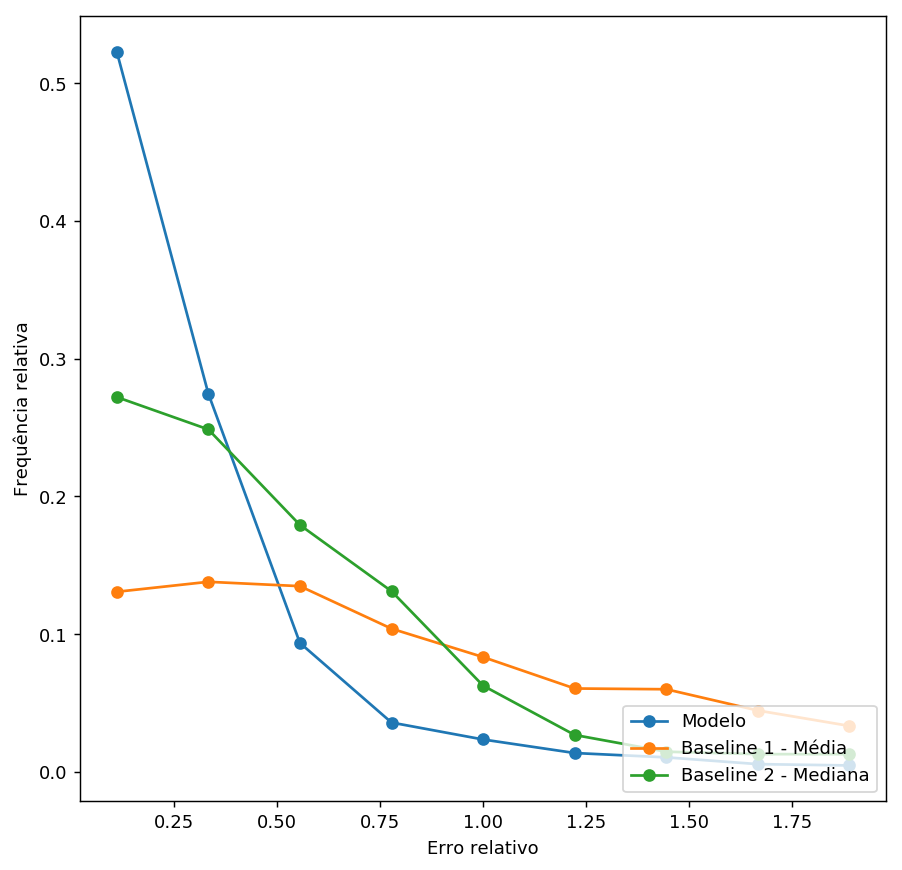

In [27]:
centers, normalized_hist_predicted, normalized_hist_baseline, normalized_hist_baseline_median = shared_functions.plot_relative_error_distribution(predicted_df)

#### Accumulated

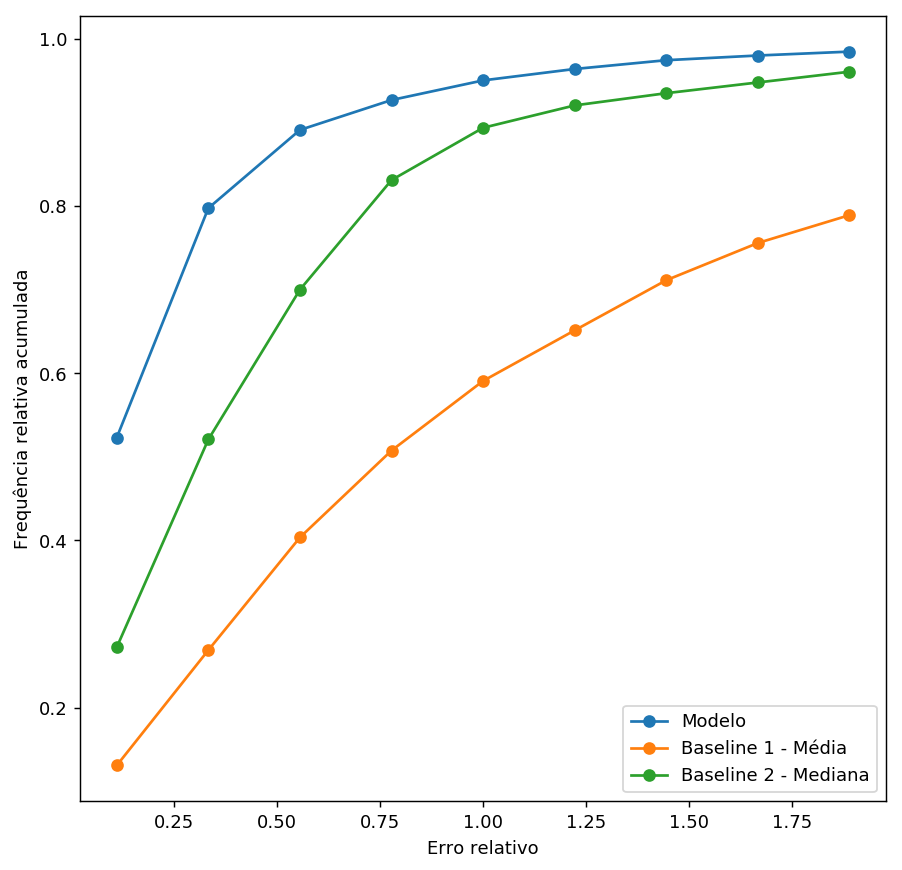

In [28]:
shared_functions.plot_accumulated_relative_error(centers, normalized_hist_predicted, normalized_hist_baseline, normalized_hist_baseline_median)

### Joined data summary

In [29]:
joined_predicted_df.describe(percentiles=[0.25, 0.5, 0.75, 0.85, 0.9, 0.95, 0.99])

,error,error_baseline,error_baseline_median,error_baseline_median_relative,error_baseline_relative,error_relative,prediction,target,id,edition,category8,category9,category10,postProcessed,price,ranking,pages,reviewCount,rating,width,height,depth,weight,eigenvector_centrality,degree,betweenness_centrality
count,7322.000000,7322.000000,7322.000000,7322.000000,7322.000000,7322.000000,7322.000000,7322.000000,7322.000000,0.0,0.0,0.0,0.0,7322.0,7322.000000,7322.000000,7322.000000,7322.000000,7322.000000,7322.000000,7322.000000,7322.000000,7322.000000,7.322000e+03,7322.000000,7322.000000
mean,23.447560,58.266699,46.511870,0.593322,1.340564,0.345101,68.926227,72.208906,4886.643403,NaN,NaN,NaN,NaN,1.0,72.208906,35585.483524,352.930291,14.459684,4.443324,15.263199,22.253770,2.084178,426.164773,3.344467e-03,31.169899,0.000989
std,74.415847,136.590140,144.833613,0.694793,1.513313,0.528384,118.117383,148.500297,2822.040294,NaN,NaN,NaN,NaN,0.0,148.500297,46014.100393,250.899762,33.842735,0.549974,2.587859,2.602049,1.234792,202.789050,9.456514e-03,34.494156,0.001537
min,0.001000,0.011094,0.025000,0.000637,0.000154,0.000027,10.665000,2.900000,1.000000,NaN,NaN,NaN,NaN,1.0,2.900000,4.000000,2.000000,1.000000,1.000000,0.800000,8.600000,0.200000,4.500000,6.734553e-11,1.000000,0.000000
25%,3.702875,24.461406,7.785000,0.199908,0.413603,0.099294,28.668000,26.327500,2479.250000,NaN,NaN,NaN,NaN,1.0,26.327500,8346.250000,192.000000,2.000000,4.400000,13.600000,20.800000,1.300000,281.000000,1.796572e-05,8.000000,0.000186
50%,8.599500,39.218906,16.025000,0.418585,0.873853,0.211552,38.440750,39.225000,4862.500000,NaN,NaN,NaN,NaN,1.0,39.225000,22995.500000,304.000000,10.000000,4.445241,15.304075,22.600000,1.800000,426.421903,2.104564e-04,19.000000,0.000508
75%,17.560875,51.218906,28.235000,0.743560,1.742719,0.384885,61.316250,63.147500,7318.500000,NaN,NaN,NaN,NaN,1.0,63.147500,45245.500000,432.000000,14.304266,4.800000,16.000000,23.200000,2.600000,540.000000,1.610659e-03,43.000000,0.001205
85%,27.029925,57.308906,51.335000,0.937083,2.454972,0.547638,87.653200,90.560000,8334.850000,NaN,NaN,NaN,NaN,1.0,90.560000,62755.100000,544.000000,14.304266,5.000000,17.000000,23.900000,3.000000,640.000000,4.684921e-03,61.000000,0.001803
90%,38.421400,62.308906,80.775000,1.180378,3.013836,0.711573,116.161850,120.000000,8802.900000,NaN,NaN,NaN,NaN,1.0,120.000000,78759.200000,624.000000,20.000000,5.000000,18.900000,25.400000,3.400000,721.000000,8.845712e-03,77.000000,0.002318
95%,71.265750,122.776594,155.760500,1.803788,4.161466,1.107807,187.863950,194.985500,9299.950000,NaN,NaN,NaN,NaN,1.0,194.985500,107276.900000,784.000000,43.000000,5.000000,20.800000,27.600000,4.200000,821.000000,1.948917e-02,99.000000,0.003481


# Finished

In [30]:
finished_at = time.time()
duration = finished_at - started_at
print "Duração em segundos:"
print duration

Duração em segundos:
529.959509134


<img src="files/image.png">